## FIR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from scipy.signal import butter, filtfilt
from scipy.signal import cheby2, filtfilt

In [2]:
def fir_filter(signal, cutoff_freq, fs, num_taps=101):
    nyquist_freq = 0.5 * fs
    cutoff_norm = cutoff_freq / nyquist_freq
    taps = firwin(num_taps, cutoff_norm)
    filtered_signal = lfilter(taps, 1.0, signal)
    return filtered_signal

In [3]:
path = "data/2_1.txt"

ppg = pd.read_csv(path, sep="\t", header=None).T.dropna()

In [4]:
# ppg_2_1.head(5)

In [5]:
def plotter(signal, title):
    # plt.figure(figsize=(10,6))
    #plt.figure(figsize=(14, 10))
    plt.plot(signal)
    plt.title(titl
    plt.show()

In [22]:
# plotter(ppg, "PPG Not Filtered")

according to Nyquist theorem:<br/>
fs = int(2100 / 2.1)<br/>
cutoff_freq <= int(0.5 * fs)

In [7]:
# fs = 1000
# cutoff_freq = 0.45 * fs  


fs = 800
cutoff_freq = 0.45 * fs  



ppg_FIR_filtered = fir_filter(ppg, cutoff_freq, fs, num_taps=101)

In [23]:
# plotter(ppg_FIR_filtered, "PPG filtered with FIR filter")

## IIR

In [9]:
def iir_filter(signal, cutoff_freq, fs, order=4):
    nyquist_freq = 0.5 * fs
    cutoff_norm = cutoff_freq / nyquist_freq
    b, a = butter(order, cutoff_norm, btype='low')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

In [10]:
ppg_IIR_filtered = fir_filter(ppg, cutoff_freq, fs, num_taps=101)

In [24]:
# plotter(ppg_IIR_filtered, "PPG filtered with FIR filter")

**compare two check**

In [25]:
#plt.figure(figsize=(10,6))
#plt.plot(ppg_IIR_filtered)
#plt.plot(ppg_FIR_filtered)
#plt.show()

## FIR hanning

In [13]:
def fir_filter_hanning(signal, cutoff_freq, fs, num_taps):
    nyquist_freq = 0.5 * fs
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    taps = np.hanning(num_taps)
    taps /= np.sum(taps)

    signal = np.asarray(signal).ravel()
    filtered_signal = np.convolve(signal, taps, mode='same')
    
    return filtered_signal

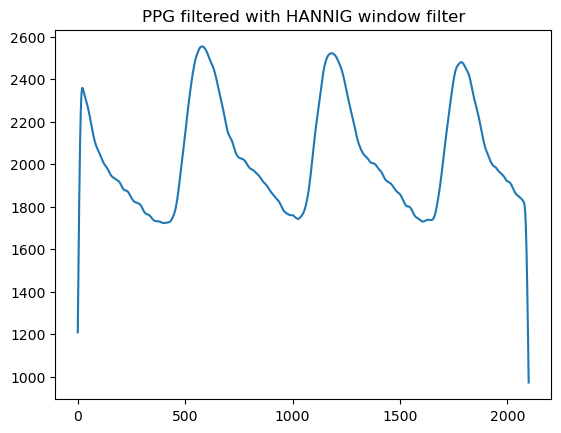

In [33]:
# num_taps = 100
fs = 800
cutoff_freq = 0.45 * fs  


ppg_HANNING = fir_filter_hanning(ppg, cutoff_freq, fs, num_taps = 50)
plotter(ppg_HANNING, "PPG filtered with HANNIG window filter")

## FIR hamming

In [15]:
def fir_filter_hamming(signal, cutoff_freq, fs, num_taps):
    nyquist_freq = 0.5 * fs
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    taps = np.hamming(num_taps)
    taps /= np.sum(taps)
    
    signal = np.asarray(signal).ravel()
    filtered_signal = np.convolve(signal, taps, mode='same')
    
    return filtered_signal

In [16]:
num_taps = 150
fs = 800
cutoff_freq = 0.45 * fs 

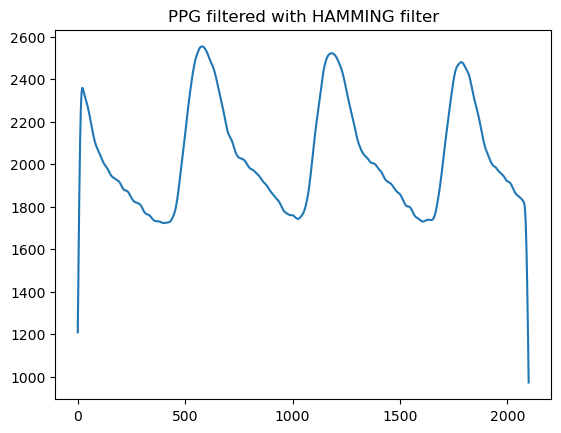

In [34]:
ppg_HAMMING = fir_filter_hanning(ppg, cutoff_freq, fs, num_taps = 150)
plotter(ppg_HANNING, "PPG filtered with HAMMING filter")

## RESAMPLE HANNING

In [18]:
def resample_hanning(signal, new_length):
    original_length = len(signal)
    t = np.linspace(0, 1, original_length)
    new_t = np.linspace(0, 1, new_length)
    
    window = np.hanning(original_length)
    resampled_signal = np.interp(new_t, t, signal * window)
    
    return resampled_signal

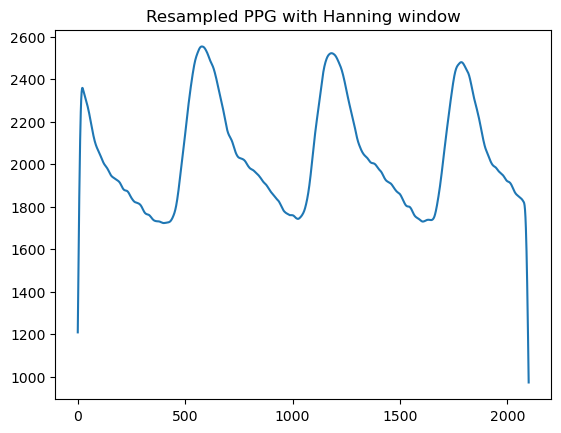

In [19]:
# ppg_numpy = ppg.to_numpy()  
ppg_conv = np.asarray(ppg).ravel()
resample_han = resample_hanning(ppg_conv, 300)
plotter(ppg_HANNING, "Resampled PPG with Hanning window")

## Resample Hamming

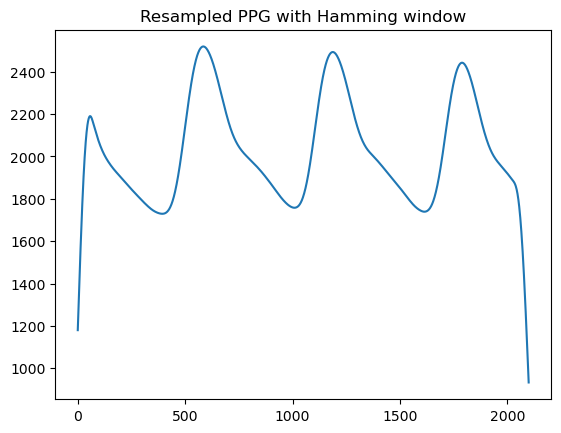

In [20]:
def resample_hamming(signal, new_length):
    original_length = len(signal)
    t = np.linspace(0, 1, original_length)
    new_t = np.linspace(0, 1, new_length)
    
    window = np.hamming(original_length)
    resampled_signal = np.interp(new_t, t, signal * window)
    
    return resampled_signal

# Assuming ppg is a pandas Series
ppg_conv = np.asarray(ppg).ravel()
resample_ham = resample_hanning(ppg_conv, 700)
plotter(ppg_HAMMING, "Resampled PPG with Hamming window")

**comparison**

NameError: name 'ppg_cheb' is not defined

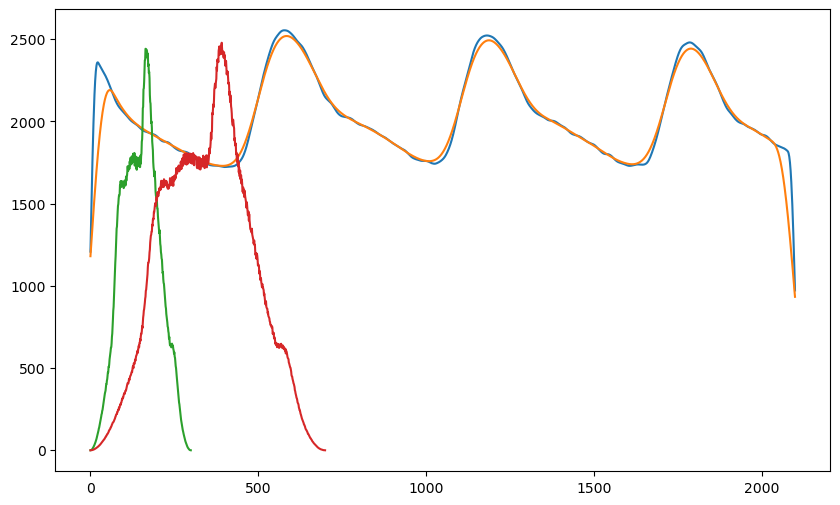

In [21]:
plt.figure(figsize=(10,6))
plt.plot(ppg_HANNING)
plt.plot(ppg_HAMMING)
plt.plot(resample_han)
plt.plot(resample_ham)
plt.plot(ppg_cheb)

plt.show()

In [27]:
def filter_ppg_cheby2(ppg_signal, filter_mode='lowpass', cutoff_freq=1, order=4, fs=100):
    """
    Filter a PPG signal using Chebyshev Type II digital filtering.
    
    Parameters:
    - ppg_signal: Input PPG signal (1D numpy array)
    - filter_mode: Filter mode ('lowpass', 'highpass', 'bandpass', 'bandstop')
    - cutoff_freq: Cutoff frequency for the filter (in Hz)
    - order: Filter order
    - fs: Sampling frequency of the signal (in Hz)
    
    Returns:
    - filtered_signal: Filtered PPG signal
    """
    
    nyquist_freq = 0.5 * fs
    
    if filter_mode == 'lowpass':
        b, a = cheby2(order, 30, cutoff_freq/nyquist_freq, 'low')
    elif filter_mode == 'highpass':
        b, a = cheby2(order, 30, cutoff_freq/nyquist_freq, 'high')
    elif filter_mode == 'bandpass':
        b, a = cheby2(order, 30, [cutoff_freq[0]/nyquist_freq, cutoff_freq[1]/nyquist_freq], 'bandpass')
    elif filter_mode == 'bandstop':
        b, a = cheby2(order, 30, [cutoff_freq[0]/nyquist_freq, cutoff_freq[1]/nyquist_freq], 'bandstop')
    else:
        raise ValueError("Invalid filter mode. Choose from 'lowpass', 'highpass', 'bandpass', or 'bandstop'")
    
    filtered_signal = filtfilt(b, a, ppg_signal)
    
    return filtered_signal

In [30]:
ppg_cheb = filter_ppg_cheby2(ppg_conv)
# plotter(ppg_cheb, "PPG filtered with Chebyshev II")

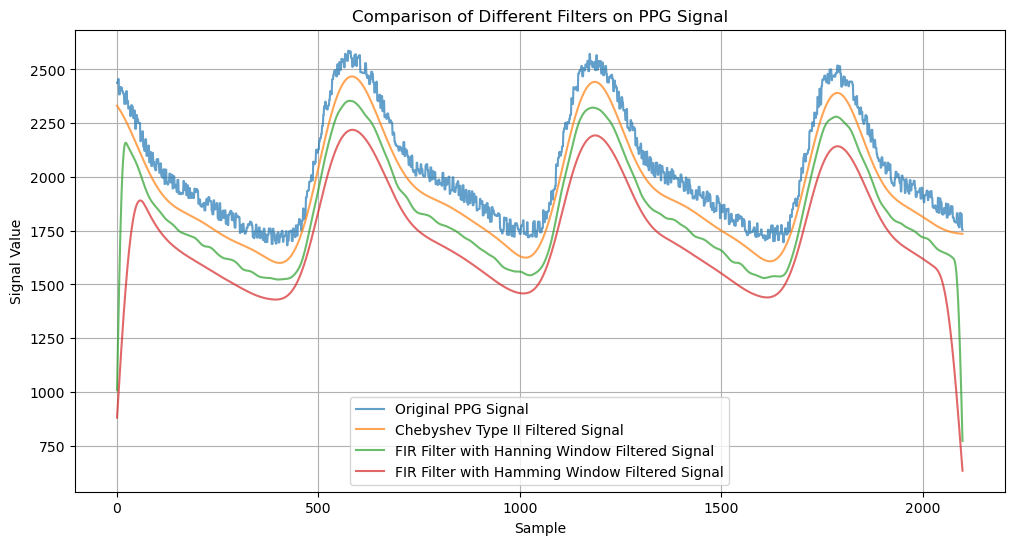

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(ppg, label='Original PPG Signal', alpha=0.7)
plt.plot(ppg_cheb - 100, label='Chebyshev Type II Filtered Signal', alpha=0.7)
plt.plot(ppg_HANNING - 200, label='FIR Filter with Hanning Window Filtered Signal', alpha=0.7)
plt.plot(ppg_HAMMING - 300, label='FIR Filter with Hamming Window Filtered Signal', alpha=0.7)
plt.xlabel('Sample')
plt.ylabel('Signal Value')
plt.title('Comparison of Different Filters on PPG Signal')
plt.legend()
plt.grid(True)
plt.show()